In [1]:
from model_api import PoseExtraction
import numpy as np
p=PoseExtraction(r"/home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT")

/home/axel_ubuntu/anaconda3/envs/PCT_linux/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


<module 'matplotlib.pyplot' from '/home/axel_ubuntu/anaconda3/envs/PCT_linux/lib/python3.8/site-packages/matplotlib/pyplot.py'>

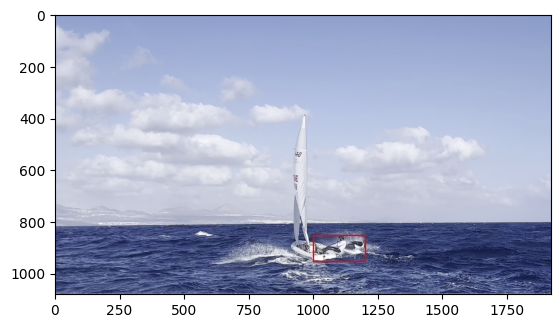

In [2]:
x_start = 1000
x_end = 1200
y_start = 850
y_end = 950
video=r"/home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT/videos/470Hiking.mov"
init_bbox=[x_start,y_start,x_end,y_end]
p.vis_bbox_first_frame(init_bbox,video)

In [3]:
init_bbox=[x_start,y_start,x_end,y_end]
human_poses=p.end_to_end(video,init_bbox)

100%|████████████████████████████████████████████████████████| 362/362
2023-08-17 13:44:28,412 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-08-17 13:44:28,413 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-08-17 13:44:28,414 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1517.4 task/s, elapsed: 0s, ETA:     0s[                                                  ] 0/100, elapsed: 0s, ETA:


WARNING ⚠️ SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 2 persons, 2: 384x640 1 person, 3: 384x640 1 person, 4: 384x640 1 person, 5: 384x640 2 persons, 6: 384x640 1 person, 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 1 person, 10: 384x640 2 persons, 11: 384x640 1 person, 12: 384x640 2 persons, 13: 384x640 1 person, 14: 384x640 (no detections), 15: 384x640 1 person, 16: 384x640 1 person, 17: 384x640 1 person, 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 1 person, 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640 (no detections), 33: 384x640 (no detections), 34: 384x640 (no detections), 35: 

[                                 ] 1/100, 7.5 task/s, elapsed: 0s, ETA:    13s

/home/axel_ubuntu/anaconda3/envs/PCT_linux/lib/python3.8/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


[>>>>>>>>>>>>                   ] 40/100, 10.6 task/s, elapsed: 4s, ETA:     6s

2023-08-17 13:44:44,587 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-08-17 13:44:44,589 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-08-17 13:44:44,589 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1840.8 task/s, elapsed: 0s, ETA:     0s[                                                  ] 0/100, elapsed: 0s, ETA:


WARNING ⚠️ SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 1 person, 1: 384x640 2 persons, 2: 384x640 (no detections), 3: 384x640 2 persons, 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 1 person, 7: 384x640 (no detections), 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 1 person, 12: 384x640 (no detections), 13: 384x640 1 person, 14: 384x640 1 person, 15: 384x640 2 persons, 16: 384x640 1 person, 17: 384x640 (no detections), 18: 384x640 2 persons, 19: 384x640 (no detections), 20: 384x640 1 person, 21: 384x640 (no detections), 22: 384x640 1 person, 23: 384x640 (no detections), 24: 384x640 1 person, 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 1 person, 30: 384x640 1 person, 31: 384x640 (no detections), 32: 384x640 1 person, 33: 384x640 1 person, 34: 384x640 1 person, 35: 384x640 1 person, 36:

[>>>>>>>>>>>>>>                 ] 46/100, 11.9 task/s, elapsed: 4s, ETA:     5s

2023-08-17 13:44:57,855 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-08-17 13:44:57,856 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-08-17 13:44:57,857 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 1819.9 task/s, elapsed: 0s, ETA:     0s[                                                  ] 0/100, elapsed: 0s, ETA:


WARNING ⚠️ SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 (no detections), 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 1 person, 6: 384x640 (no detections), 7: 384x640 1 person, 8: 384x640 1 person, 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 (no detections), 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 1 person, 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 1 person, 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 (no detections), 24: 384x640 (no detections), 25: 384x640 1 person, 26: 384x640 1 person, 27: 384x640 (no detections), 28: 384x640 1 person, 29: 384x640 (no detections), 30: 384x640 1 person, 31: 384x640 1 person, 32: 384x640 (no detections), 33: 384x640 (no d

[>>>>>>                         ] 22/100, 10.2 task/s, elapsed: 2s, ETA:     8s

2023-08-17 13:45:08,878 - mmtrack - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-08-17 13:45:08,879 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-08-17 13:45:08,880 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 62/62, 1472.3 task/s, elapsed: 0s, ETA:     0s[                                                  ] 0/62, elapsed: 0s, ETA:


WARNING ⚠️ SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 384x640 (no detections), 1: 384x640 (no detections), 2: 384x640 1 person, 3: 384x640 (no detections), 4: 384x640 1 person, 5: 384x640 (no detections), 6: 384x640 (no detections), 7: 384x640 (no detections), 8: 384x640 (no detections), 9: 384x640 (no detections), 10: 384x640 (no detections), 11: 384x640 (no detections), 12: 384x640 (no detections), 13: 384x640 1 person, 14: 384x640 (no detections), 15: 384x640 (no detections), 16: 384x640 (no detections), 17: 384x640 1 person, 18: 384x640 (no detections), 19: 384x640 (no detections), 20: 384x640 (no detections), 21: 384x640 (no detections), 22: 384x640 (no detections), 23: 384x640 1 person, 24: 384x640 1 person, 25: 384x640 (no detections), 26: 384x640 (no detections), 27: 384x640 (no detections), 28: 384x640 (no detections), 29: 384x640 (no detections), 30: 384x640 (no detections), 31: 384x640 (no detections), 32: 384x640

[>>>>>                           ] 10/62, 10.0 task/s, elapsed: 1s, ETA:     5s

In [6]:
p.create_video(human_poses)

[                                                  ] 0/362, elapsed: 0s, ETA:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 37.6 task/s, elapsed: 10s, ETA:     0s

In [ ]:
#the superresolution network
p.run_rvrt(folder_lq="/home/axel_ubuntu/RISE/WSL/SailingPoseEstimation/PCT/temp/raw_frames",
         tile=[30,64,64],
         tile_overlap=[2,20,20],
         num_workers=2,
         save_result=True)
